# Scottish Index Multiple Deprivation 2020  
## Initail look at data files avaible and what they contain.  
  
https://www.gov.scot/collections/scottish-index-of-multiple-deprivation-2020/

***

The data was aviable as excel files (inidcators and ranks) and a shape file including geodata.  
There is also an interactive map that data can be downloaded from. This gave a zip with geodata, a csv and an excel file.

## Import standard packages

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

***
## Import data to dataframes

In [3]:
# Setting path to data

path = 'data/'

In [4]:
# Importing indicators excel file data
# File has three sheets. Contents and notes, Indicator descriptions and Data

indicatorsdf = pd.read_excel(path +'SIMD+2020v2+-+indicators.xlsx', sheet_name="Data",  index_col=0)

In [5]:
# Importing Rank excel file

ranksdf = pd.read_excel(path +'SIMD+2020v2+-+ranks.xlsx', sheet_name="SIMD 2020v2 ranks",  index_col=0)

In [6]:
# Importing geo data

gdf = gpd.read_file(path+"SG_SIMD_2020.zip").set_index('DataZone')

# Renaming index to match the previous 2
gdf.index.names = ['Data_Zone']
gdf.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [7]:
# Importing geo data from interactive map

gdf2 = gpd.read_file(path+"simd2020_withgeog").set_index('DataZone')

# Renaming index to match the previous 2
gdf2.index.names = ['Data_Zone']
gdf2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
# Importing csv data from interactive map

frominterdf = pd.read_csv(path+"simd2020_withgeog/simd2020_withinds.csv", index_col=0)

If this proves intresting could create a sparql query of the statistics.gov.scot site to create a customised dataset, although not all data is avaiable in that method.

Example query (From https://github.com/GregorBoyd/sparql-queries/blob/master/Queries/Covid-19%20death%20rates%20by%20local%20authority.sparqlused to check code) Cheers Gregor!

In [9]:
from SPARQLWrapper import SPARQLWrapper, CSV
import pandas as pd
import io


sparql = SPARQLWrapper("http://statistics.gov.scot/sparql")

sparql.setQuery("""
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?
WHERE {
    <http://statistics.gov.scot/data/scottish-index-of-multiple-deprivation>
}

ORDER BY ?

LIMIT 7000
""")

sparql.setQuery("""
PREFIX dcat: <http://www.w3.org/ns/dcat#>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX qb: <http://purl.org/linked-data/cube#>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX sdmx: <http://purl.org/linked-data/sdmx/2009/concept#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX void: <http://rdfs.org/ns/void#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT  ?Local_Authority  ?COVIDdeaths ?population (ROUND(((?COVIDdeaths)/(?population)*100000)) AS ?COVIDdeathsper100k)
WHERE {
  ?s <http://purl.org/linked-data/sdmx/2009/dimension#refArea> ?LA.
  ?LA <http://statistics.data.gov.uk/def/statistical-entity#code> <http://statistics.gov.scot/id/statistical-entity/S12>.
  ?LA rdfs:label ?Local_Authority.
  ?s qb:dataSet <http://statistics.gov.scot/data/deaths-involving-coronavirus-covid-19>.
  ?s <http://statistics.gov.scot/def/measure-properties/count> ?COVIDdeaths.
  ?s <http://statistics.gov.scot/def/dimension/sex> <http://statistics.gov.scot/def/concept/sex/all>.
  ?s <http://statistics.gov.scot/def/dimension/age> <http://statistics.gov.scot/def/concept/age/all>.
  ?s <http://statistics.gov.scot/def/dimension/locationOfDeath> <http://statistics.gov.scot/def/concept/location-of-death/all>.
  ?s <http://purl.org/linked-data/sdmx/2009/dimension#refPeriod> <http://reference.data.gov.uk/id/year/2020>.
  ?s <http://statistics.gov.scot/def/dimension/causeOfDeath> <http://statistics.gov.scot/def/concept/cause-of-death/covid-19-related>.
  ?d <http://purl.org/linked-data/sdmx/2009/dimension#refArea> ?LA.
  ?d <http://statistics.gov.scot/def/measure-properties/count> ?population.
  ?d qb:dataSet <http://statistics.gov.scot/data/population-estimates-current-geographic-boundaries>.
  ?d <http://statistics.gov.scot/def/dimension/sex> <http://statistics.gov.scot/def/concept/sex/all>.
  ?d <http://statistics.gov.scot/def/dimension/age> <http://statistics.gov.scot/def/concept/age/all>.
  ?d <http://purl.org/linked-data/sdmx/2009/dimension#refPeriod> <http://reference.data.gov.uk/id/year/2019>.
}

ORDER BY ?Local_Authority

LIMIT 100
""")
sparql.setReturnFormat(CSV)
results = sparql.query().convert()


resdf = pd.read_csv(io.StringIO(results.decode('utf-8')))

In [10]:
resdf

,Local_Authority,COVIDdeaths,population,COVIDdeathsper100k
0,Aberdeen City,193,228670,84.0
1,Aberdeenshire,161,261210,62.0
2,Angus,99,116200,85.0
3,Argyll and Bute,86,85870,100.0
4,City of Edinburgh,557,524930,106.0
5,Clackmannanshire,66,51540,128.0
6,Dumfries and Galloway,79,148860,53.0
7,Dundee City,220,149320,147.0
8,East Ayrshire,159,122010,130.0
9,East Dunbartonshire,208,108640,191.0


***
## Initial look at data

In [11]:
# Commonly rerun code cell (comment in/out)
#pd.set_option('display.max_rows', None)
#pd.set_option('max_columns', None)

#Change working dataframe

#df = indicatorsdf
#df = ranksdf
#df = pd.DataFrame(gdf.drop(columns='geometry'))
df = frominterdf

#indicatorsdf.shape # Initialy (6976, 36)
#ranksdf.shape # Initialy (6976, 12)
#df.shape # (6976, 51)

#df.head
#df.columns
#df.info
#df.dtypes
#df.nunique()
df.isnull().sum()

#df.columns.to_series().groupby(df.dtypes).groups


Intermediate_Zone                   0
Council_area                        0
Total_population                    0
Working_Age_population              0
SIMD2020v2_Rank                     0
SIMD_2020v2_Percentile              0
SIMD2020v2_Vigintile                0
SIMD2020v2_Decile                   0
SIMD2020v2_Quintile                 0
SIMD2020v2_Income_Domain_Rank       0
SIMD2020_Employment_Domain_Rank     0
SIMD2020_Health_Domain_Rank         0
SIMD2020_Education_Domain_Rank      0
SIMD2020_Access_Domain_Rank         0
SIMD2020_Crime_Domain_Rank          0
SIMD2020_Housing_Domain_Rank        0
income_rate                         0
income_count                        0
employment_rate                     0
employment_count                    0
CIF                                 3
ALCOHOL                             2
DRUG                                2
SMR                                 2
DEPRESS                             1
LBWT                                1
EMERG       

- All dataframes contain 6976 rows based on a "Data Zone", this is a uniquie id, used as index.
- Shap file has 51 columns. 3 For geodata makes 48 Which could be the 36 plus 12, However they also share 2 columns so need to check what these are.
- A few collumns have zeros with crime_count, crime_rate, Attendance, and Attainment with many. Could this indicate incomplete data? Areas without schools or crime?
- Some columns of indicatorsdf should be numeric but on import have strings (*) in some rows so have dtype object. Notes on use of * found in supporting documents
- Several percentage columns. Might be worth multipling by 100 as symbol has been stripped.
- Shape file from interactive map also includes older data (from 2011) for population

Will deal with Nans on a use basis so not replacing or dropping at the moment.

***
### Fix any data import dtype problems  
  


In [12]:
# Converting percentage that pulled through as decimals to percent by multipling by 100

percents = ['Income_rate', 'Employment_rate', 'DEPRESS', 'LBWT', 'Attendance', 'not_participating', 'University', 'Broadband', 'overcrowded_rate', 'nocentralheat_rate']
indicatorsdf[percents] = indicatorsdf[percents].ffill() *100

In [13]:
#Convert object to numeric

shouldbenumbers = ['Income_rate', 'Employment_rate', 'CIF', 'ALCOHOL', 'DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment', 'not_participating', 'University', 'Broadband', 'crime_count', 'crime_rate']
indicatorsdf[shouldbenumbers] = indicatorsdf[shouldbenumbers].apply(pd.to_numeric, errors='coerce')

In [14]:
# Can any created floats be ints?
#(df[shouldbenumbers] % 1  == 0).all() # None
(indicatorsdf[shouldbenumbers].fillna(-9999) % 1  == 0).all()

Income_rate          False
Employment_rate      False
CIF                   True
ALCOHOL              False
DRUG                 False
SMR                  False
DEPRESS              False
LBWT                 False
EMERG                False
Attendance           False
Attainment           False
not_participating    False
University           False
Broadband            False
crime_count          False
crime_rate           False
dtype: bool

CIF could be safly converted to int, has nans so Int64.  
On checking excel file, Income_rate and Employment_rate are both recorded to percent accuracy, they fail the previous test due to a float convertion error. Other percentage have more than percentage accuracy so retaining as floats.


In [15]:
#eg
indicatorsdf['Income_rate']['S01006644']

7.000000000000001

In [16]:
# Convert to int (Needs to be int64 as some nans)

floattoint = ['CIF', 'Income_rate', 'Employment_rate']
indicatorsdf[floattoint] = indicatorsdf[floattoint].round(0).astype('Int64')
indicatorsdf[floattoint]

,CIF,Income_rate,Employment_rate
Data_Zone,,,
S01006506,65,8,8
S01006507,45,5,5
S01006508,45,6,4
S01006509,80,10,8
S01006510,95,10,8
...,...,...,...
S01013477,120,13,11
S01013478,100,9,8
S01013479,140,18,16


### Probably worth sticking the indicatorsdf and ranks together. Looks like same rows.

- Income and Employemnt ranks have some .5s. Expected this to be an integer. It appears to be when two are are equal. eg 66, 67.5, 67.5, 69. This most likely due to the percentage accuracy of the Income and Employment rates usd in the indicators. Not sure how this ranking system would deal with 3 of the same rank, would they all take the middle value?

In [17]:
# Merging dataframes

indicators_ranksdf = pd.merge(ranksdf, indicatorsdf, left_index=True, right_index=True)
indicators_ranksdf.shape

(6976, 48)

In [18]:
# Function for listing duplicate columns

def getDupCols(df):

    ColNames = set()
    dupColNames = set()
      
    for x in range(df.shape[1]):
          
        col = df.iloc[:, x]
          
        for y in range(x + 1, df.shape[1]):
              
            otherCol = df.iloc[:, y]
              
            if col.equals(otherCol):
                ColNames.add(df.columns.values[x])
                dupColNames.add(df.columns.values[y])
                print(df.columns.values[y], 'is a dup of', df.columns.values[x])
                
    return list(dupColNames)

In [19]:
# Get list of duplicate columns
# And drop them
indicators_ranksdf = indicators_ranksdf.drop(columns=getDupCols(indicators_ranksdf))

Intermediate_Zone_y is a dup of Intermediate_Zone_x
Council_area_y is a dup of Council_area_x
Total_population_y is a dup of Total_population_x
Working_age_population_y is a dup of Working_age_population_x


In [20]:
indicators_ranksdf.rename(columns={'Intermediate_Zone_x': 'Intermediate_Zone', 'Council_area_x': 'Council_area', 'Total_population_x': 'Total_population', 'Working_age_population_x': 'Working_age_population'}, inplace=True)

In [21]:
indicators_ranksdf.shape

(6976, 44)

Reduce memmory

In [22]:
# Mem reduction function by converting data types. (Credit to Guillaume Martin and Arjan Groen)

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return

reduce_mem_usage(indicators_ranksdf)

Mem. usage decreased to  1.50 Mb (43.9% reduction)


### Geodata

In [23]:
gdf

,DZName,LAName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,IncRate,...,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area,geometry
Data_Zone,,,,,,,,,,,,,,,,,,,,,
S01006506,Culter - 01,Aberdeen City,894,580,4691,4,7,14,68,8%,...,125,4664.0,87,10,10%,1%,3248.0,11801.872345,4.388802e+06,"POLYGON ((383285.265 800510.607, 383348.492 80..."
S01006507,Culter - 02,Aberdeen City,793,470,4862,4,7,14,70,5%,...,128,4602.0,85,4,10%,0%,3486.0,2900.406362,2.217468e+05,"POLYGON ((383527.919 801536.276, 383541.089 80..."
S01006508,Culter - 03,Aberdeen City,624,461,5686,5,9,17,82,6%,...,130,4563.5,31,8,5%,1%,5342.0,3468.761949,2.701948e+05,"POLYGON ((383473.000 801227.000, 383597.000 80..."
S01006509,Culter - 04,Aberdeen City,537,307,4332,4,7,13,63,10%,...,75,5626.0,42,6,7%,1%,4394.5,1647.461389,9.625426e+04,"POLYGON ((383976.659 801182.579, 383984.102 80..."
S01006510,Culter - 05,Aberdeen City,663,415,3913,3,6,12,57,10%,...,168,3885.0,50,7,9%,1%,3736.0,3026.111412,1.800766e+05,"POLYGON ((384339.000 801211.000, 384316.510 80..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S01013477,Broxburn South - 06,West Lothian,612,355,2464,2,4,8,36,13%,...,217,3161.0,93,10,15%,2%,1671.0,1775.782199,1.098816e+05,"POLYGON ((308686.000 672220.000, 308688.000 67..."
S01013478,Broxburn East - 01,West Lothian,817,582,3681,3,6,11,53,9%,...,350,1819.0,87,1,10%,0%,3594.0,2319.192976,1.243817e+05,"POLYGON ((307423.889 672579.756, 307424.594 67..."
S01013479,Broxburn East - 02,West Lothian,785,479,1423,2,3,5,21,18%,...,560,795.0,96,9,12%,1%,2624.0,3234.544766,2.671458e+05,"POLYGON ((308478.000 672440.000, 308485.000 67..."


<AxesSubplot:>

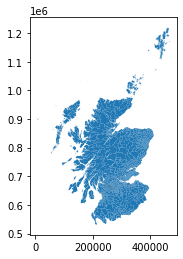

In [24]:
# Check plot of geometry
gdf.plot()

## Comparing data on excel files and geo data

In [25]:
gdf.shape #(6976, 51)
gdf.columns

Index(['DZName', 'LAName', 'SAPE2017', 'WAPE2017', 'Rankv2', 'Quintilev2',
       'Decilev2', 'Vigintilv2', 'Percentv2', 'IncRate', 'IncNumDep',
       'IncRankv2', 'EmpRate', 'EmpNumDep', 'EmpRank', 'HlthCIF', 'HlthAlcSR',
       'HlthDrugSR', 'HlthSMR', 'HlthDprsPc', 'HlthLBWTPc', 'HlthEmergS',
       'HlthRank', 'EduAttend', 'EduAttain', 'EduNoQuals', 'EduPartici',
       'EduUniver', 'EduRank', 'GAccPetrol', 'GAccDTGP', 'GAccDTPost',
       'GAccDTPsch', 'GAccDTSsch', 'GAccDTRet', 'GAccPTGP', 'GAccPTPost',
       'GAccPTRet', 'GAccBrdbnd', 'GAccRank', 'CrimeCount', 'CrimeRate',
       'CrimeRank', 'HouseNumOC', 'HouseNumNC', 'HouseOCrat', 'HouseNCrat',
       'HouseRank', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [26]:
indicators_ranksdf.shape #(6976, 44)
indicators_ranksdf.columns

Index(['Intermediate_Zone', 'Council_area', 'Total_population',
       'Working_age_population', 'SIMD2020v2_Rank',
       'SIMD2020v2_Income_Domain_Rank', 'SIMD2020_Employment_Domain_Rank',
       'SIMD2020_Health_Domain_Rank', 'SIMD2020_Education_Domain_Rank',
       'SIMD2020_Access_Domain_Rank', 'SIMD2020_Crime_Domain_Rank',
       'SIMD2020_Housing_Domain_Rank', 'Income_rate', 'Income_count',
       'Employment_rate', 'Employment_count', 'CIF', 'ALCOHOL', 'DRUG', 'SMR',
       'DEPRESS', 'LBWT', 'EMERG', 'Attendance', 'Attainment',
       'no_qualifications', 'not_participating', 'University', 'drive_petrol',
       'drive_GP', 'drive_post', 'drive_primary', 'drive_retail',
       'drive_secondary', 'PT_GP', 'PT_post', 'PT_retail', 'Broadband',
       'crime_count', 'crime_rate', 'overcrowded_count', 'nocentralheat_count',
       'overcrowded_rate', 'nocentralheat_rate'],
      dtype='object')

- Again a few columns have be read as object dtypes, % sysmbol pulled through on read.
- Mainly the same columns as previously but with different keys. Some appear to be rounded.
- A few extra colomns not in previous excel files. These are the quintile, decile, vigintile, percentile, shape length and area and the geometry column.
- DZName is the same as Intermediate_Zone but also numbered. 
- All data from ranks excel sheet is replicated identically.

In [27]:
#  Addtional columns on geo flie to indicators.

newcols = ['DZName', 'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2', 'Shape_Leng', 'Shape_Area', 'geometry']
    
gdfnew = gdf[newcols]
gdfnew

,DZName,Quintilev2,Decilev2,Vigintilv2,Percentv2,Shape_Leng,Shape_Area,geometry
Data_Zone,,,,,,,,
S01006506,Culter - 01,4,7,14,68,11801.872345,4.388802e+06,"POLYGON ((383285.265 800510.607, 383348.492 80..."
S01006507,Culter - 02,4,7,14,70,2900.406362,2.217468e+05,"POLYGON ((383527.919 801536.276, 383541.089 80..."
S01006508,Culter - 03,5,9,17,82,3468.761949,2.701948e+05,"POLYGON ((383473.000 801227.000, 383597.000 80..."
S01006509,Culter - 04,4,7,13,63,1647.461389,9.625426e+04,"POLYGON ((383976.659 801182.579, 383984.102 80..."
S01006510,Culter - 05,3,6,12,57,3026.111412,1.800766e+05,"POLYGON ((384339.000 801211.000, 384316.510 80..."
...,...,...,...,...,...,...,...,...
S01013477,Broxburn South - 06,2,4,8,36,1775.782199,1.098816e+05,"POLYGON ((308686.000 672220.000, 308688.000 67..."
S01013478,Broxburn East - 01,3,6,11,53,2319.192976,1.243817e+05,"POLYGON ((307423.889 672579.756, 307424.594 67..."
S01013479,Broxburn East - 02,2,3,5,21,3234.544766,2.671458e+05,"POLYGON ((308478.000 672440.000, 308485.000 67..."


Adding addtional geo file data to sorted excel data to create geopandas dataframe with greater accuracy.  
Including DZName with areas numbered as can use to merge houseprice and urban/rural rank data  

In [28]:
full_SIMDdf = pd.merge(gdf[newcols], indicators_ranksdf, left_index=True, right_index=True)

In [29]:
reduce_mem_usage(full_SIMDdf)

Mem. usage decreased to  1.68 Mb (12.5% reduction)


In [30]:
full_SIMDdf.shape

(6976, 52)

In [31]:
full_SIMDdf.columns

Index(['DZName', 'Quintilev2', 'Decilev2', 'Vigintilv2', 'Percentv2',
       'Shape_Leng', 'Shape_Area', 'geometry', 'Intermediate_Zone',
       'Council_area', 'Total_population', 'Working_age_population',
       'SIMD2020v2_Rank', 'SIMD2020v2_Income_Domain_Rank',
       'SIMD2020_Employment_Domain_Rank', 'SIMD2020_Health_Domain_Rank',
       'SIMD2020_Education_Domain_Rank', 'SIMD2020_Access_Domain_Rank',
       'SIMD2020_Crime_Domain_Rank', 'SIMD2020_Housing_Domain_Rank',
       'Income_rate', 'Income_count', 'Employment_rate', 'Employment_count',
       'CIF', 'ALCOHOL', 'DRUG', 'SMR', 'DEPRESS', 'LBWT', 'EMERG',
       'Attendance', 'Attainment', 'no_qualifications', 'not_participating',
       'University', 'drive_petrol', 'drive_GP', 'drive_post', 'drive_primary',
       'drive_retail', 'drive_secondary', 'PT_GP', 'PT_post', 'PT_retail',
       'Broadband', 'crime_count', 'crime_rate', 'overcrowded_count',
       'nocentralheat_count', 'overcrowded_rate', 'nocentralheat_rate'],


In [32]:
#Disolve geopandas dataframe to council level (only works on geometry)

local_councilsgdf = gdf.dissolve(by='LAName')
local_councilsgdf

,geometry,DZName,SAPE2017,WAPE2017,Rankv2,Quintilev2,Decilev2,Vigintilv2,Percentv2,IncRate,...,CrimeCount,CrimeRate,CrimeRank,HouseNumOC,HouseNumNC,HouseOCrat,HouseNCrat,HouseRank,Shape_Leng,Shape_Area
LAName,,,,,,,,,,,,,,,,,,,,,
Aberdeen City,"MULTIPOLYGON (((384324.308 800460.918, 384315....",Culter - 01,894,580,4691,4,7,14,68,8%,...,11,125,4664.0,87,10,10%,1%,3248.0,11801.872345,4.388802e+06
Aberdeenshire,"MULTIPOLYGON (((375304.532 764499.252, 375256....",East Cairngorms - 01,562,323,6040,5,9,18,87,6%,...,5,91,5309.0,39,20,7%,3%,3731.0,5702.021416,5.254584e+05
Angus,"MULTIPOLYGON (((349810.329 732102.384, 349793....",South Angus - 01,945,568,6199,5,9,18,89,1%,...,3,33,6512.0,12,10,1%,1%,6695.0,22578.131227,1.166499e+07
Argyll and Bute,"MULTIPOLYGON (((173254.000 604986.000, 173258....","Mull, Iona, Coll and Tiree - 01",795,454,3054,3,5,9,44,7%,...,10,127,4609.0,36,79,4%,9%,2552.0,297159.998484,1.551795e+08
City of Edinburgh,"MULTIPOLYGON (((318856.842 664218.003, 318853....",Balerno and Bonnington Village - 01,708,397,5537,4,8,16,80,5%,...,6,86,5392.0,17,8,2%,1%,6350.0,20191.721420,1.029993e+07
Clackmannanshire,"POLYGON ((292045.976 689083.830, 292045.300 68...",Tullibody South - 01,694,382,3255,3,5,10,47,11%,...,15,221,3094.0,23,0,3%,0%,6353.0,11128.397077,1.775115e+06
Dumfries and Galloway,"MULTIPOLYGON (((211545.274 544410.100, 211546....",Stranraer West - 01,810,394,5176,4,8,15,75,4%,...,6,74,5650.5,1,0,0%,0%,6971.0,6029.725934,4.109210e+05
Dundee City,"POLYGON ((340774.871 730063.784, 340773.500 73...",Westend - 01,877,564,5472,4,8,16,79,5%,...,19,221,3089.0,60,8,7%,1%,4643.0,9748.873837,1.960785e+06
East Ayrshire,"MULTIPOLYGON (((247769.180 601257.940, 247769....",Doon Valley South - 01,536,344,2234,2,4,7,33,11%,...,11,207,3301.0,51,5,10%,1%,3340.0,154804.600041,2.016995e+08


<AxesSubplot:>

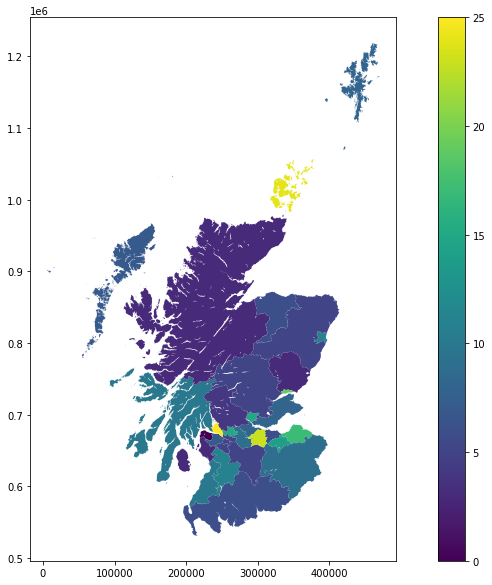

In [33]:
ax = local_councilsgdf.plot(column='CrimeCount', figsize=(15, 10), legend=True)
ax

In [34]:
full_SIMDdf.to_file(path + "SIMD.gpkg", driver="GPKG")